In [2]:
%matplotlib inline
from IPython.core.display import display, HTML
import os
import pandas as pd
import utils
import models
import semantics
pd.set_option('display.max_colwidth', 100)
root_path   = os.environ['COOPERHEWITT_ROOT']
export_path = root_path + '/export/'
df_features = pd.read_pickle(export_path + 'penmeta_features.pkl')

First component: 0.0832982361646
Second component: 0.0682679577748


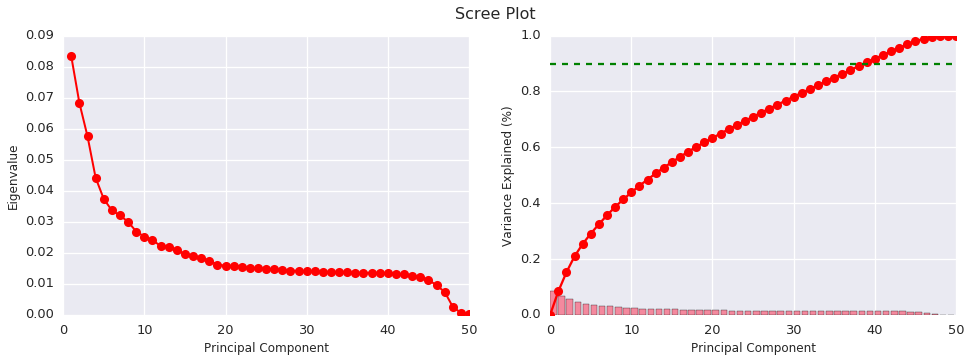

In [3]:
# perform pca, is their an elbow
%matplotlib inline
pca_model, features_transformed = models.execute_PCA(df_features, 50)
models.scree_plot(pca_model, filename=root_path + '/plots/scree_plot.png')

First component: 0.0832982361646
Second component: 0.0682679577748


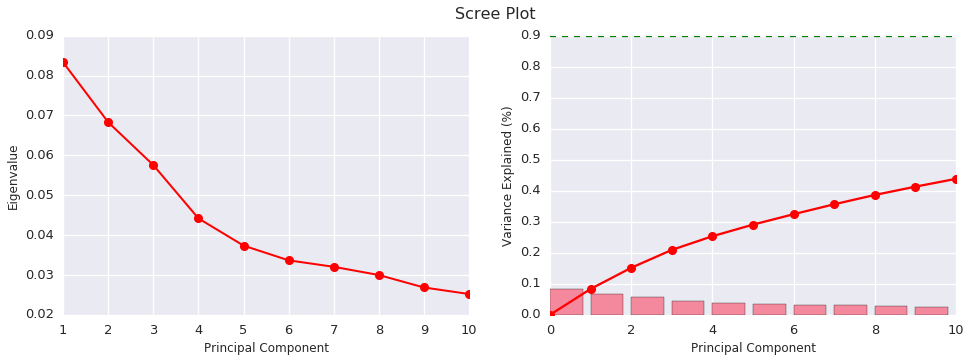

In [4]:
# compare on dimensionality reduction now
# note we really need MCA, not PCA (as we have all categorical data)
pca_model, features_pca = models.execute_PCA(df_features, 10)
models.scree_plot(pca_model, filename=root_path + '/plots/scree_plot_minimized.png')

coph distance metric evaluation 0.715504894414


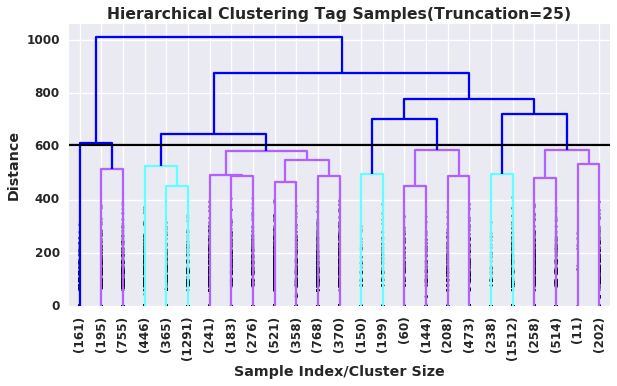

In [5]:
# we can only take a fraction of the the data due to pairwise computations and computationally expensive
samples = df_features.sample(frac=0.00275)
X = samples.values
Z, cutoff, clusters = models.execute_hierarchical_clustering(X, 'cityblock')
samples['cluster'] = clusters
models.plot_dendrogram(Z, cutoff, filename=root_path + '/plots/dendrogram.png')

In [6]:
# review the way types of artwork are associated with rooms
rooms_table = pd.read_pickle(export_path + "rooms_table.pkl")
display(semantics.explore_room_types())
display(rooms_table[rooms_table.name.isin(['103','206'])])

,query,rooms
0,Concept art,{u'103': 637}
1,Drawing,"{u'201': 58, u'202': 10102, u'205': 24814, u'206': 85, u'105': 134}"
2,poster,"{u'201': 39, u'202': 2270, u'205': 514, u'107': 46, u'206': 31}"
3,Print,"{u'201': 65, u'203': 30, u'202': 3994, u'205': 16037, u'105': 27}"
4,Sidewall,"{u'202': 19, u'205': 7, u'213': 22, u'101': 11, u'206': 42}"
5,textile,"{u'202': 25, u'205': 12, u'107': 3, u'105': 6, u'206': 24}"
6,Staircase model,"{u'212': 7, u'105': 21}"


,id,name,floor,room_count_objects,count_spots,description
1,68744887,103,1.0,793,1,Process Lab\nMr. Carnegie's Library
17,68527343,206,2.0,570,15,"Long gallery, East"


In [7]:
# explore the cluster features based on z-score
pd.DataFrame(semantics.explore_cluster_features(samples, scale_option=False, k=15)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,"(afternoon, 0.72049689441)","(month_1, 0.652173913043)","(weekend, 0.577639751553)","(wom_3, 0.354037267081)","(month_2, 0.347826086957)","(wom_2, 0.329192546584)","(tagged_after_close, 0.217391304348)","(wom_1, 0.192546583851)","(morning, 0.173913043478)","(Mon, 0.155279503106)","(wom_4, 0.124223602484)","(is_bursty, 0.0993788819876)","(Fri, 0.0931677018634)","(Thur, 0.0683229813665)","(Wed, 0.0621118012422)"
2,"(year_2015, 0.997894736842)","(afternoon, 0.634736842105)","(weekend, 0.363157894737)","(quarter_4, 0.358947368421)","(wom_4, 0.355789473684)","(quarter_2, 0.302105263158)","(tagged_after_close, 0.295789473684)","(quarter_3, 0.278947368421)","(morning, 0.261052631579)","(wom_3, 0.226315789474)","(wom_2, 0.224210526316)","(wom_1, 0.193684210526)","(Tues, 0.155789473684)","(Fri, 0.134736842105)","(month_12, 0.134736842105)"
3,"(visitor_drawn, 0.980970504282)","(floor_3, 0.823977164605)","(rm_302, 0.823977164605)","(afternoon, 0.733587059943)","(weekend, 0.40675547098)","(quarter_4, 0.363939105614)","(wom_4, 0.363463368221)","(quarter_2, 0.270694576594)","(quarter_3, 0.258325404377)","(wom_3, 0.250237868696)","(wom_2, 0.218363463368)","(morning, 0.201712654615)","(floor_1, 0.175071360609)","(wom_1, 0.167935299715)","(Wed, 0.14795432921)"
4,"(year_2015, 0.999631947)","(room_small_cap, 0.741626794258)","(floor_2, 0.676481413324)","(spot_normal_freq, 0.65034965035)","(afternoon, 0.642252484358)","(visitor_drawn, 0.635259477365)","(wom_4, 0.398969451601)","(weekend, 0.385351490615)","(quarter_3, 0.375782112624)","(spot_constant_freq, 0.332351858668)","(floor_1, 0.323518586676)","(quarter_4, 0.2999631947)","(morning, 0.255428781745)","(quarter_2, 0.253956569746)","(wom_3, 0.244019138756)"
5,"(room_midsize_cap, 0.997134670487)","(quarter_1, 0.997134670487)","(year_2016, 0.994269340974)","(month_1, 0.664756446991)","(floor_1, 0.570200573066)","(afternoon, 0.555873925501)","(spot_high_freq, 0.52435530086)","(spot_dynamic_freq, 0.47564469914)","(rm_103, 0.47564469914)","(floor_2, 0.429799426934)","(rm_206, 0.426934097421)","(weekend, 0.424068767908)","(wom_3, 0.343839541547)","(month_2, 0.332378223496)","(morning, 0.332378223496)"
6,"(room_small_cap, 0.847457627119)","(spot_normal_freq, 0.790960451977)","(afternoon, 0.716384180791)","(weekend, 0.568361581921)","(month_2, 0.51186440678)","(month_1, 0.48813559322)","(visitor_drawn, 0.378531073446)","(floor_3, 0.377401129944)","(rm_302, 0.377401129944)","(floor_2, 0.369491525424)","(wom_2, 0.362711864407)","(wom_3, 0.358192090395)","(floor_1, 0.253107344633)","(wom_1, 0.205649717514)","(spot_constant_freq, 0.202259887006)"
7,"(room_midsize_cap, 0.999428571429)","(spot_high_freq, 0.999428571429)","(rm_206, 0.999428571429)","(year_2015, 0.926857142857)","(afternoon, 0.699428571429)","(weekend, 0.417714285714)","(wom_4, 0.358285714286)","(quarter_4, 0.293714285714)","(quarter_2, 0.288)","(quarter_3, 0.282285714286)","(wom_3, 0.238285714286)","(wom_2, 0.22)","(morning, 0.216571428571)","(wom_1, 0.183428571429)","(quarter_1, 0.136)"
8,"(floor_1, 0.998984771574)","(year_2015, 0.996954314721)","(room_midsize_cap, 0.792893401015)","(quarter_4, 0.602030456853)","(afternoon, 0.593908629442)","(spot_dynamic_freq, 0.542131979695)","(rm_103, 0.542131979695)","(wom_4, 0.395939086294)","(visitor_drawn, 0.379695431472)","(weekend, 0.340101522843)","(morning, 0.278172588832)","(rm_105, 0.25076142132)","(spot_high_freq, 0.249746192893)","(wom_3, 0.221319796954)","(month_12, 0.21421319797)"


In [8]:
# TBD: SCALE and CENTER DATA (not required, as all data is categorical)
# explore the semantics overall
turnover_cols = [item for item in list(samples.columns) if "_freq"    in item]
capacity_cols = [item for item in list(samples.columns) if "_cap"     in item]
floor_cols    = [item for item in list(samples.columns) if "floor_"   in item]
room_cols     = [item for item in list(samples.columns) if "room_"    in item]
quarter_cols  = [item for item in list(samples.columns) if "quarter_" in item]
month_cols    = [item for item in list(samples.columns) if "month_"   in item]
year_cols     = [item for item in list(samples.columns) if "year_"    in item]
wom_cols      = [item for item in list(samples.columns) if "wom_"     in item]
days_cols     = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'weekend']
tod_cols      = ['pre-morning', 'morning', 'afternoon', 'evening', 'night', 'tagged_after_close']
evt_cols      = ['is_bursty', 'during_exhibition', 'visitor_drawn', 'meta_store']
semantics.explore_clusters_corr(samples, 'during_exhibition')

Cluster Label:4, Pct Sample Obs:0.274472168906
[('during_exhibition', 1.0), ('evening', 0.1886959479811515), ('Mon', 0.085125130588915687), ('month_11', 0.058904023028347435), ('quarter_4', 0.05475769289008571), ('month_10', 0.042764172369036561), ('wom_2', 0.035040949080190162), ('spot_normal_freq', 0.034494860605510463), ('Wed', 0.031945636879654071), (u'rm_203', 0.025325924383468604)]

Cluster Label:3, Pct Sample Obs:0.212344681281
[('during_exhibition', 1.0), ('floor_2', 0.44636094725915987), (u'rm_201', 0.44636094725915987), ('night', 0.44636094725913805), ('evening', 0.28897799312875244), ('month_10', 0.12506104325287704), ('Wed', 0.10749763077408145), ('wom_4', 0.06274770249867051), ('quarter_4', 0.062661760393105032), ('floor_1', 0.02272822006376185)]

Cluster Label:7, Pct Sample Obs:0.176785533892
[('during_exhibition', 1.0), ('evening', 0.15064063551341952), ('month_10', 0.051185343756170273), ('Wed', 0.04510067276611613), ('month_4', 0.041926222454132835), ('Tues', 0.0368993

In [9]:
semantics.explore_clusters_corr(samples, 'is_bursty')

Cluster Label:4, Pct Sample Obs:0.274472168906
[('is_bursty', 1.0), ('afternoon', 0.058124003700548287), ('month_6', 0.035595186475058556), ('month_12', 0.034375854037142287), ('quarter_2', 0.028858239856804559), ('visitor_drawn', 0.02879598989452236), ('wom_2', 0.02710148750684041), (u'rm_108', 0.025464410014411354), ('Tues', 0.017148869609479245), (u'rm_201', 0.016608566890801271)]

Cluster Label:3, Pct Sample Obs:0.212344681281
[('is_bursty', 1.0), ('pre-morning', 0.07171582506670654), (u'rm_302', 0.065985761403091189), ('floor_3', 0.065985761403091189), ('month_10', 0.041177425356293797), ('month_7', 0.038792093323682907), ('Mon', 0.037999957794192088), ('Wed', 0.028399448874650946), ('month_11', 0.028127607716120443), ('wom_1', 0.027429607821189125)]

Cluster Label:7, Pct Sample Obs:0.176785533892
[('is_bursty', 1.0), ('evening', 0.064932810206163274), ('Thur', 0.037688918072221668), ('wom_2', 0.029565619799453956), ('month_8', 0.022947836809380461), ('month_5', 0.0181633802933166

In [11]:
# review exibitions
rooms_table = pd.read_pickle(export_path + "rooms_table.pkl")
room_map    = utils.rename_rooms(df_features, rooms_table)[1]
df_features_renamed = df_features.rename(columns=room_map)
df_features_renamed.corr(method='pearson')['during_exhibition'].sort_values(ascending=False)[:10]

during_exhibition    1.000000
night                0.377217
evening              0.205980
Mon                  0.050296
month_10             0.041814
Wed                  0.038824
quarter_4            0.036959
year_2014            0.033618
month_11             0.028681
year_2015            0.021858
Name: during_exhibition, dtype: float64